In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import tensorflow_datasets as tfds
from kerod.dataset.preprocessing import preprocess, expand_dims_for_single_batch

ds_train, ds_info = tfds.load(name="coco/2017", split="train", shuffle_files=True, with_info=True)
ds_train = ds_train.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.map(expand_dims_for_single_batch, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [1]:
1e-2 * 0.33

0.0033000000000000004

In [16]:
import matplotlib.pyplot as plt
import numpy as np

from kerod.model.backbone.resnet import Resnet50, padd_for_aligning_pixels

In [12]:
for x in ds_train:
    break

In [87]:
1600 / 32

50.0

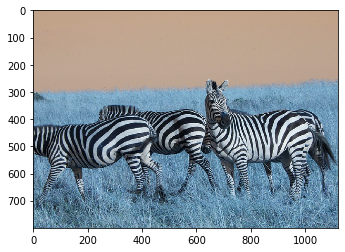

In [14]:
plt.imshow(image[0].numpy().astype(np.uint8))

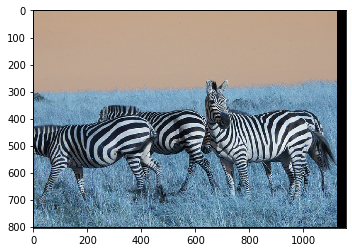

In [17]:
image_padded = padd_for_aligning_pixels(image)
plt.imshow(image_padded[0].numpy().astype(np.uint8))

In [18]:
model = Resnet50()

In [19]:
_, outputs = model(image)

In [21]:
outputs[0].shape

TensorShape([1, 805, 1157, 3])

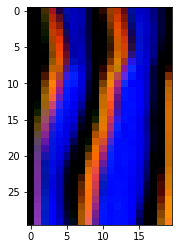

In [43]:
plt.imshow(outputs[1][0,220:250,:20,:3])

In [36]:
outputs[1][0, 1, 1, 0]

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [86]:
8*118000


944000

In [83]:
y_max1 = np.array([[[ 7.],
        [10.]],

       [[ 7.],
        [ 0.]]], dtype=np.float32)
y_max2 = np.array([[[ 6.],
        [15.],
        [20.]],

       [[ 6.],
        [15.],
        [20.]]], dtype=np.float32)
tf.minimum(y_max1, tf.transpose(y_max2, perm=[2, 0, 1]))

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[ 6.,  7.,  7.],
        [ 6., 10., 10.]],

       [[ 6.,  7.,  7.],
        [ 0.,  0.,  0.]]], dtype=float32)>

In [81]:
tf.transpose(y_max2, perm=[0, 2, 1])


<tf.Tensor: shape=(2, 1, 3), dtype=float32, numpy=
array([[[ 6., 15., 20.]],

       [[ 6., 15., 20.]]], dtype=float32)>

In [56]:
boxes = tf.constant([[[0, 0, 1, 1], [0, 0, 0, 0]],[[0, 0, 1, 1], [0, 0, 1, 1]]])

In [59]:
my_ragged_tensor = tf.RaggedTensor.from_tensor(boxes, lengths=[1, 2])

In [66]:
def do_somestuff(boxes):
    test =  boxes * boxes + 1 
    return test

value = tf.vectorized_map(do_somestuff,my_ragged_tensor)

ValueError: TypeError: object of type 'RaggedTensor' has no len()


In [65]:
value

<tf.Tensor: shape=(2, 3, 4), dtype=float32, numpy=
array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]], dtype=float32)>